In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd

wildfires_with_closest_station_df = pd.read_csv('/content/drive/MyDrive/CS249-Winter2024-Project/wildfires-with-closest-station.csv', delimiter=',')
print(list(wildfires_with_closest_station_df.columns))
# wildfires_with_closest_station_df.iloc[:5]

['OBJECTID', 'poly_SourceOID', 'poly_IncidentName', 'poly_FeatureCategory', 'poly_MapMethod', 'poly_GISAcres', 'poly_CreateDate', 'poly_DateCurrent', 'poly_PolygonDateTime', 'poly_IRWINID', 'poly_FORID', 'poly_Acres_AutoCalc', 'poly_SourceGlobalID', 'poly_Source', 'attr_SourceOID', 'attr_ABCDMisc', 'attr_ADSPermissionState', 'attr_CalculatedAcres', 'attr_ContainmentDateTime', 'attr_ControlDateTime', 'attr_CreatedBySystem', 'attr_IncidentSize', 'attr_DiscoveryAcres', 'attr_DispatchCenterID', 'attr_EstimatedCostToDate', 'attr_FinalAcres', 'attr_FFReportApprovedByTitle', 'attr_FFReportApprovedByUnit', 'attr_FFReportApprovedDate', 'attr_FireBehaviorGeneral', 'attr_FireBehaviorGeneral1', 'attr_FireBehaviorGeneral2', 'attr_FireBehaviorGeneral3', 'attr_FireCause', 'attr_FireCauseGeneral', 'attr_FireCauseSpecific', 'attr_FireCode', 'attr_FireDepartmentID', 'attr_FireDiscoveryDateTime', 'attr_FireMgmtComplexity', 'attr_FireOutDateTime', 'attr_FireStrategyConfinePercent', 'attr_FireStrategyFullS

In [7]:
wildfires_with_closest_station_df['attr_FireDiscoveryDateTime'] = pd.to_datetime(wildfires_with_closest_station_df['attr_FireDiscoveryDateTime'])
wildfires_with_closest_station_df['attr_FireOutDateTime'] = pd.to_datetime(wildfires_with_closest_station_df['attr_FireOutDateTime'])

wildfires_with_closest_station_df['Discovery_Year'] = wildfires_with_closest_station_df['attr_FireDiscoveryDateTime'].dt.year
wildfires_with_closest_station_df['Discovery_Month'] = wildfires_with_closest_station_df['attr_FireDiscoveryDateTime'].dt.month
wildfires_with_closest_station_df['Discovery_Day'] = wildfires_with_closest_station_df['attr_FireDiscoveryDateTime'].dt.day
wildfires_with_closest_station_df['Out_Year'] = wildfires_with_closest_station_df['attr_FireOutDateTime'].dt.year
wildfires_with_closest_station_df['Out_Month'] = wildfires_with_closest_station_df['attr_FireOutDateTime'].dt.month
wildfires_with_closest_station_df['Out_Day'] = wildfires_with_closest_station_df['attr_FireOutDateTime'].dt.day

wildfires_with_closest_station_df['Fire_Duration'] = (wildfires_with_closest_station_df['attr_FireOutDateTime'] - wildfires_with_closest_station_df['attr_FireDiscoveryDateTime']).dt.total_seconds() / 3600.0  # Duration in hours



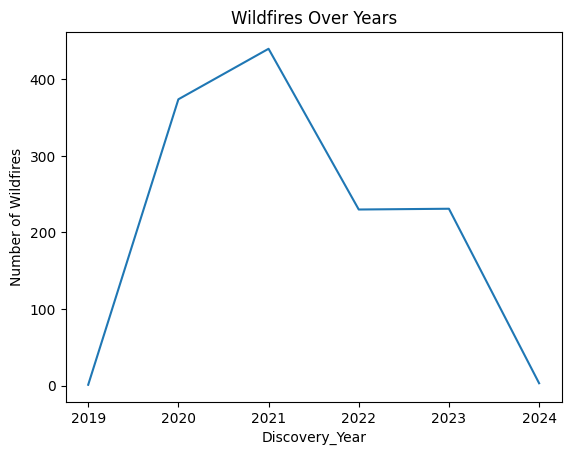

In [8]:
import matplotlib.pyplot as plt

wildfires_with_closest_station_df.groupby('Discovery_Year')['OBJECTID'].count().plot(kind='line', title='Wildfires Over Years')
plt.ylabel('Number of Wildfires')
plt.show()


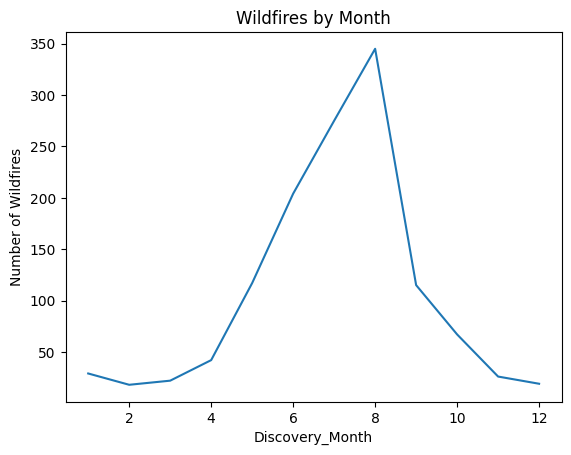

In [9]:
import matplotlib.pyplot as plt

wildfires_with_closest_station_df.groupby('Discovery_Month')['OBJECTID'].count().plot(kind='line', title='Wildfires by Month')
plt.ylabel('Number of Wildfires')
plt.show()


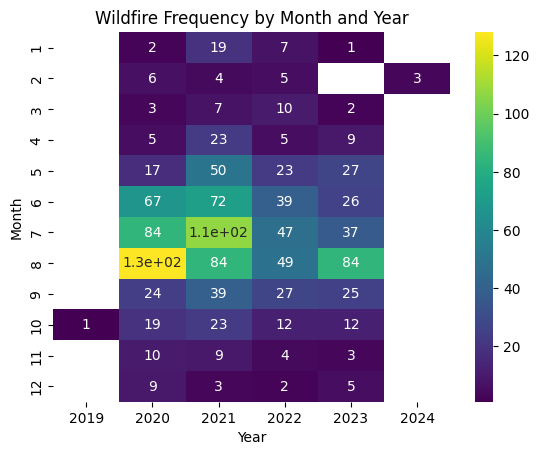

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

fire_counts_by_month_year = wildfires_with_closest_station_df.pivot_table(index='Discovery_Month', columns='Discovery_Year', values='OBJECTID', aggfunc='count')
sns.heatmap(fire_counts_by_month_year, cmap='viridis', annot=True)
plt.title('Wildfire Frequency by Month and Year')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()


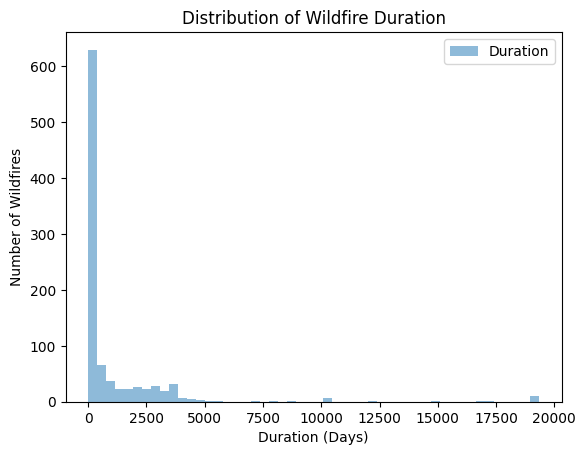

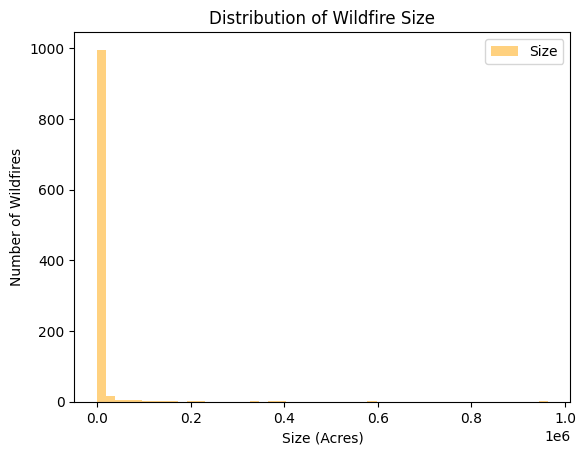

In [12]:
import matplotlib.pyplot as plt

# Histogram of wildfire duration
plt.hist(wildfires_with_closest_station_df['Fire_Duration'].dropna(), bins=50, alpha=0.5, label='Duration')
plt.xlabel('Duration (Days)')
plt.ylabel('Number of Wildfires')
plt.title('Distribution of Wildfire Duration')
plt.legend()
plt.show()

# Histogram of wildfire size
plt.hist(wildfires_with_closest_station_df['poly_GISAcres'].dropna(), bins=50, alpha=0.5, label='Size', color='orange')
plt.xlabel('Size (Acres)')
plt.ylabel('Number of Wildfires')
plt.title('Distribution of Wildfire Size')
plt.legend()
plt.show()


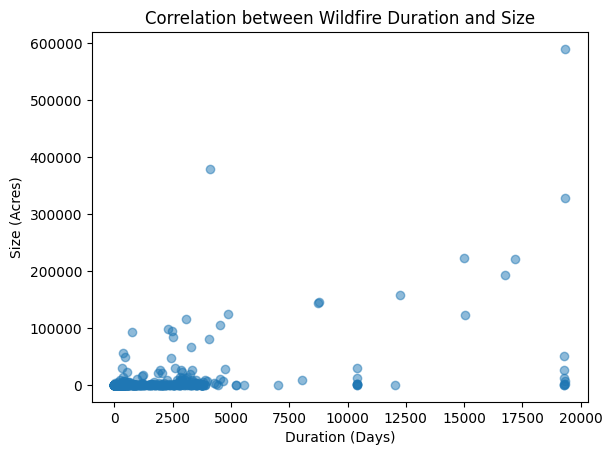

In [13]:
plt.scatter(wildfires_with_closest_station_df['Fire_Duration'], wildfires_with_closest_station_df['poly_GISAcres'], alpha=0.5)
plt.xlabel('Duration (Days)')
plt.ylabel('Size (Acres)')
plt.title('Correlation between Wildfire Duration and Size')
plt.show()


In [14]:
spearman_corr = wildfires_with_closest_station_df[['Fire_Duration', 'poly_GISAcres']].corr(method='spearman')
print(spearman_corr)


               Fire_Duration  poly_GISAcres
Fire_Duration       1.000000       0.544801
poly_GISAcres       0.544801       1.000000


Positive Correlation: The positive value of the correlation coefficient indicates that there is a positive association between wildfire duration and size. As one increases, the other tends to increase as well.

Strength of Relationship: The coefficient value of 0.545 suggests a moderate positive relationship. While there's a tendency for longer fires to be larger, the relationship is not perfect, and other factors not captured in this analysis may influence the size and duration of wildfires.

Non-linear Relationship: Spearman's rank correlation is based on the rank order of values rather than their actual magnitudes, which means it can capture non-linear relationships better than Pearson's correlation. This coefficient suggests that, regardless of the actual size or duration values, wildfires that last longer tend to be ranked higher in size, and vice versa.

Implications: The implication of this moderate correlation is that longer-burning wildfires could potentially cover more acres, which can be critical information for fire management and resource allocation. It could inform models predicting the potential impact of a wildfire over time, allowing for better preparedness and response strategies.

Other Factors: A correlation of 0.545 is significant but not so strong that one can predict size directly from duration with high accuracy. It's important to account for other variables that can influence the extent of wildfires, such as weather conditions, fuel availability, topography, and firefighting efforts.

Data Distribution: If the size data is highly skewed (which is typical for wildfire sizes), the Spearman correlation is a better measure than Pearson's because it mitigates the influence of extreme values.

Causal Relationship: It's important to remember that correlation does not imply causation. The observed relationship does not mean that longer duration directly causes a larger fire size or vice versa. Other underlying variables might drive both, or it could be a combination of factors contributing to the observed correlation.

In [15]:
import numpy as np

def haversine(lon1, lat1, lon2, lat2):
    # Convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371 # Radius of Earth in kilometers. Use 3956 for miles
    return c * r

wildfires_with_closest_station_df['distance_to_station'] = wildfires_with_closest_station_df.apply(
    lambda row: haversine(row['attr_InitialLongitude'], row['attr_InitialLatitude'],
                          row['LONGITUDE'], row['LATITUDE']),
    axis=1
)


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



# Prepare the predictors (X) and the target variable (y)
X = wildfires_with_closest_station_df[['distance_to_station']]
y = wildfires_with_closest_station_df['poly_GISAcres']

# Assuming 'y' is your target variable
y_clean = y.dropna()

# You also need to remove the corresponding rows from 'X'
X_clean = X.loc[y_clean.index]


# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.3, random_state=7)

# Initialize and fit the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Use the model to make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model (e.g., using R-squared)
r_squared = model.score(X_test, y_test)
print(f'R-squared: {r_squared}')


R-squared: -0.01063478908271942


In [18]:
import scipy.stats as stats

# Calculate the mean size and the confidence interval
mean_size = y.mean()
ci_low, ci_high = stats.t.interval(0.95, len(y_clean)-1, loc=mean_size, scale=stats.sem(y_clean))

print(f"Mean wildfire size is {mean_size} acres with a 95% confidence interval of ({ci_low}, {ci_high}) acres.")


Mean wildfire size is 6174.041152643583 acres with a 95% confidence interval of (3490.822605829661, 8857.259699457505) acres.


In [24]:
from scipy.stats import ttest_ind

#range in kilometers
for threshold in range(50):
  # Define two groups based on distance to the closest station
  close_fires = wildfires_with_closest_station_df[wildfires_with_closest_station_df['distance_to_station'] <= threshold]['poly_GISAcres']
  far_fires = wildfires_with_closest_station_df[wildfires_with_closest_station_df['distance_to_station'] > threshold]['poly_GISAcres']

  # Perform the t-test
  t_stat, p_value = ttest_ind(close_fires.dropna(), far_fires.dropna())

  print(f"Threshold in Kilometers: {threshold}, T-statistic: {t_stat}, P-value: {p_value}")


Threshold in Kilometers: 0, T-statistic: nan, P-value: nan
Threshold in Kilometers: 1, T-statistic: -0.34741332738699404, P-value: 0.728351115772618
Threshold in Kilometers: 2, T-statistic: -0.8118627545734829, P-value: 0.41705616526746114
Threshold in Kilometers: 3, T-statistic: 0.7343785743784186, P-value: 0.46288358060048906
Threshold in Kilometers: 4, T-statistic: 0.20267855156853556, P-value: 0.8394259313813381
Threshold in Kilometers: 5, T-statistic: -0.3056136346429608, P-value: 0.7599599969964965
Threshold in Kilometers: 6, T-statistic: -0.6602207312336403, P-value: 0.5092583841337037
Threshold in Kilometers: 7, T-statistic: -1.1487924375559941, P-value: 0.2509057210591464
Threshold in Kilometers: 8, T-statistic: -1.5650184582471722, P-value: 0.11788279137622282
Threshold in Kilometers: 9, T-statistic: -0.2906080995582357, P-value: 0.7714090037279535
Threshold in Kilometers: 10, T-statistic: -0.610528494707311, P-value: 0.541645165644099
Threshold in Kilometers: 11, T-statistic

Key Observations:
Varying Significance: Most P-values are well above the typical alpha level of 0.05, suggesting no statistically significant difference in the characteristics of wildfires based on the specified distance thresholds for most of the ranges tested.

Closest Approach to Significance: At a threshold of 22 kilometers, you have the lowest P-value of approximately 0.090, which, while not traditionally significant, is the closest to indicating a potential difference between the groups. This suggests that at around 22 km, there might be a trend worth investigating further, although the evidence is not strong enough to definitively say there is a significant difference.

Negative T-statistics for Closer Distances: Negative T-statistic values, such as those seen at thresholds below 22 kilometers, indicate that the mean value of your variable of interest (e.g., wildfire size) for wildfires within the threshold distance is lower than that for wildfires outside of it. However, given the high P-values, these differences are not statistically significant.

Turning Point and Positive T-statistics: Interestingly, beyond 22 kilometers, your T-statistics become positive, and P-values increase, suggesting any potential difference diminishes and possibly reverses direction. Yet, the significance remains low (high P-values), indicating no strong evidence of difference.

Interpretation:
No Clear Impact of Distance on Wildfire Characteristics: The data does not provide strong evidence that the distance from a weather station significantly impacts the measured characteristics of wildfires within the thresholds tested. This could imply that either the distance to the nearest weather station is not a major factor influencing these characteristics, or that any potential effects are obscured by other variables not accounted for in this simple comparison.

Consideration for Further Analysis: The near-significant P-value at 22 kilometers might suggest a specific range within which weather station data could have some influence on wildfire characteristics, although this influence does not appear strong or consistent across distances. It might be worth exploring other factors or conducting more nuanced analyses that consider additional variables or use more complex models to uncover any subtle effects.

In [25]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Example: Testing wildfire size differences across fire causes
model = ols('poly_GISAcres ~ C(attr_FireCause)', data=wildfires_with_closest_station_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)


                         sum_sq     df         F    PR(>F)
C(attr_FireCause)  7.035243e+09    3.0  0.758944  0.517616
Residual           1.344117e+12  435.0       NaN       NaN


Interpretation of Your Results:
Sum of Squares: The sum of squares due to the attr_FireCause is approximately 7.035 billion, whereas the residual sum of squares is about 1.344 trillion. This suggests that while some variation in the dependent variable (perhaps wildfire size or duration) is explained by the fire cause, a much larger portion remains unexplained.
Degrees of Freedom: With 3 degrees of freedom for the factor, this confirms that attr_FireCause has 4 distinct levels. The residual degrees of freedom indicate a relatively large sample size (438 observations).
F-Statistic and P-value: The F-statistic value of 0.758944 and the associated p-value of 0.517616 suggest that there is no statistically significant difference in the means of the dependent variable across the different fire cause categories at the conventional alpha levels (e.g., 0.05). In simple terms, the variation in wildfire characteristics like size or duration that could be attributed to the cause of the fire is not significant enough to reject the null hypothesis that all group means are equal.
Conclusion:
The ANOVA test did not find evidence to suggest that the cause of the fire (attr_FireCause) has a significant impact on the dependent variable you're examining (assuming it could be size, duration, or another metric). This finding means that, based on your sample data and within the context of this analysis, the reason a wildfire starts does not significantly affect this particular characteristic of the wildfire.

In [26]:
from scipy.stats import chi2_contingency

# Example: Testing association between fire cause and management complexity
contingency_table = pd.crosstab(wildfires_with_closest_station_df['attr_FireCause'], wildfires_with_closest_station_df['attr_FireMgmtComplexity'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("P-value:", p)


P-value: 0.3746382306605877


Statistical Significance: Common thresholds for significance are p-values of 0.05 or 0.01. Since your p-value (0.3746) is much higher than these thresholds, the test does not provide strong evidence against the null hypothesis. This means you would typically conclude that there is not a significant relationship between the variables based on the data you analyzed.

Effect on Decision Making: The absence of a statistically significant association suggests that, within the context of the data analyzed, one variable does not depend on the other. For example, if you were testing the relationship between fire cause categories (attr_FireCause) and fire management complexity (attr_FireMgmtComplexity), your result would imply that the management complexity of a wildfire is not significantly dependent on its cause, according to the categories defined and the data collected.

Cautions in Interpretation: The lack of a statistically significant result does not prove that there is no relationship whatsoever between the variables; rather, it suggests that any relationship that might exist could not be detected as statistically significant with the sample size and data quality you have. Factors such as a small sample size, misclassification of categories, or low variability in the data could influence this outcome.

Further Analysis: Consider whether additional data, a larger sample size, or a different analytical approach might reveal more insights. It's also possible that while a broad association was not found, specific sub-categories or conditions might exhibit a significant relationship when analyzed separately or with more nuanced methods.

In summary, the Chi-square test with a p-value of approximately 0.3746 does not support rejecting the null hypothesis of independence between the two categorical variables you examined. This finding guides you towards concluding that, within the limitations of the dataset and the specific categories analyzed, there's no evidence of a statistically significant association between these variables.